## Imports

In [1]:
import csv, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import dataframe_image as dfi
%matplotlib inline

## Functions

In [2]:
def getObjectMethods(obj):
    [print(method) for method in dir(obj) if callable(getattr(obj, method))]

## Analysis

In [3]:
path = "../Data/data.csv"
df = pd.read_csv(path)
df = df.dropna(subset=['permissions', 'installs'])
df

,title,appId,url,developer,devID,price,free,category,permissions,installs
0,TikTok - Trends Start Here,com.zhiliaoapp.musically,https://play.google.com/store/apps/details?id=...,TikTok Pte. Ltd.,TikTok+Pte.+Ltd.,0.00,True,APPLICATION,{'Device & app history': ['retrieve running ap...,"1,000,000,000+"
1,ZOOM Cloud Meetings,us.zoom.videomeetings,https://play.google.com/store/apps/details?id=...,zoom.us,zoom.us,0.00,True,APPLICATION,{'Device ID & call information': ['read phone ...,"100,000,000+"
2,WhatsApp Messenger,com.whatsapp,https://play.google.com/store/apps/details?id=...,WhatsApp Inc.,WhatsApp+Inc.,0.00,True,APPLICATION,"{'Contacts': ['modify your contacts', 'find ac...","5,000,000,000+"
3,Cash App,com.squareup.cash,https://play.google.com/store/apps/details?id=...,"Square, Inc.",4878871734928263649,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device', '...","10,000,000+"
4,"Discord - Talk, Video Chat & Hang Out with Fri...",com.discord,https://play.google.com/store/apps/details?id=...,Discord Inc.,Discord+Inc.,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device'], ...","100,000,000+"
...,...,...,...,...,...,...,...,...,...,...
13163,Kids Trains Pro,com.ogien.kidstrainspro,https://play.google.com/store/apps/details?id=...,3583 Bytes,7830845280092528776,1.49,False,FAMILY_PRETEND,{'Other': ['full network access']},500+
13164,Sago Mini Town,com.sagosago.Town.googleplay,https://play.google.com/store/apps/details?id=...,Sago Mini,6600704821286067966,3.99,False,FAMILY_PRETEND,{'Photos/Media/Files': ['read the contents of ...,"10,000+"
13165,Sago Mini Super Juice,com.sagosago.Juice.googleplay,https://play.google.com/store/apps/details?id=...,Sago Mini,6600704821286067966,3.99,False,FAMILY_PRETEND,{'Wi-Fi connection information': ['view Wi-Fi ...,"5,000+"
13166,My Town : ICEME Amusement Park,mytown.amusementpark,https://play.google.com/store/apps/details?id=...,My Town Games Ltd,4907572025980617983,2.99,False,FAMILY_PRETEND,{'Photos/Media/Files': ['read the contents of ...,"10,000+"


In [4]:
df['category'].unique()

array(['APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
       'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS',
       'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME',
       'GAME_ACTION', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_BOARD',
       'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', 'GAME_EDUCATIONAL',
       'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING',
       'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', 'GAME_TRIVIA',
       'GAME_WORD', 'FAMILY', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES',
       'FAMILY_CREATE', 'FAMILY_EDUCATION', 'FAMILY_MU

In [5]:
df2 = df.groupby('category')['appId'].count()

# IF WE WANT TO REMOVE LABELS
remove = ['GAME_ACTION', 'GAME_ADVENTURE',\
       'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', \
       'GAME_EDUCATIONAL', 'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', \
       'GAME_ROLE_PLAYING', 'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', \
       'GAME_TRIVIA', 'GAME_WORD', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES', 'FAMILY_CREATE', \
       'FAMILY_EDUCATION', 'FAMILY_MUSICVIDEO', 'FAMILY_PRETEND']

df = df[~df['category'].isin(remove)]
df2 = df2.drop(labels=remove)
print(len(df2.index))

'''
# OR COMBINE THEM
games = ['GAME_ACTION', 'GAME_ADVENTURE',\
       'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', \
       'GAME_EDUCATIONAL', 'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', \
       'GAME_ROLE_PLAYING', 'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', \
       'GAME_TRIVIA', 'GAME_WORD']
family = ['FAMILY_ACTION', 'FAMILY_BRAINGAMES', 'FAMILY_CREATE', \
       'FAMILY_EDUCATION', 'FAMILY_MUSICVIDEO', 'FAMILY_PRETEND']

df[['category']] = df[['category']].replace(games, 'GAME')
df[['category']] = df[['category']].replace(family, 'FAMILY')
'''


36


"\n# OR COMBINE THEM\ngames = ['GAME_ACTION', 'GAME_ADVENTURE',       'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL',        'GAME_EDUCATIONAL', 'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING',        'GAME_ROLE_PLAYING', 'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY',        'GAME_TRIVIA', 'GAME_WORD']\nfamily = ['FAMILY_ACTION', 'FAMILY_BRAINGAMES', 'FAMILY_CREATE',        'FAMILY_EDUCATION', 'FAMILY_MUSICVIDEO', 'FAMILY_PRETEND']\n\ndf[['category']] = df[['category']].replace(games, 'GAME')\ndf[['category']] = df[['category']].replace(family, 'FAMILY')\n"

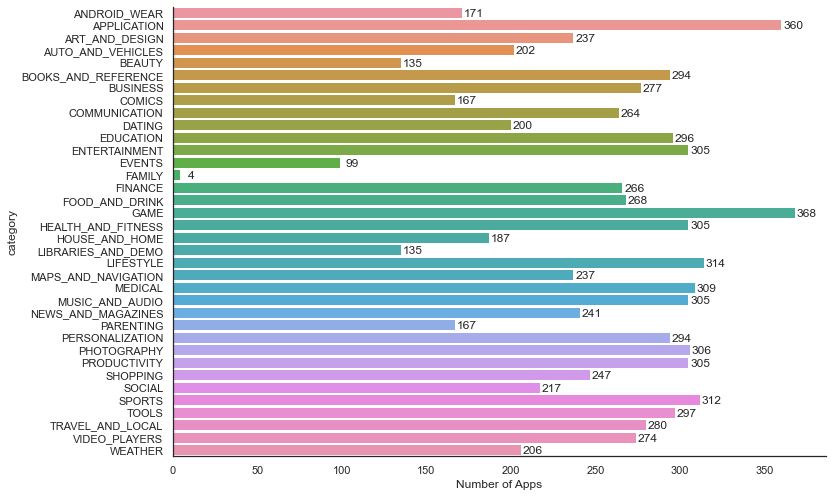

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
splot = sns.barplot(x=df2.values, y=df2.index, orient = 'h', linewidth=0)
splot.set(xlabel="Number of Apps")
sns.despine()
for p in splot.patches:
    width = p.get_width()
    plt.text(7+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.savefig('permissions_per_cat.png', bbox_inches = "tight")

In [7]:
df = df.copy()
for idx, row in df.iterrows():
    d = ast.literal_eval(row['permissions'])
    num = 0
    for key, value in d.items():
        for item in value:
            num += 1
    #row['num_permissions'] = count
    df.loc[idx, "num_permissions"] = int(num)

In [8]:
df

,title,appId,url,developer,devID,price,free,category,permissions,installs,num_permissions
0,TikTok - Trends Start Here,com.zhiliaoapp.musically,https://play.google.com/store/apps/details?id=...,TikTok Pte. Ltd.,TikTok+Pte.+Ltd.,0.00,True,APPLICATION,{'Device & app history': ['retrieve running ap...,"1,000,000,000+",24.0
1,ZOOM Cloud Meetings,us.zoom.videomeetings,https://play.google.com/store/apps/details?id=...,zoom.us,zoom.us,0.00,True,APPLICATION,{'Device ID & call information': ['read phone ...,"100,000,000+",29.0
2,WhatsApp Messenger,com.whatsapp,https://play.google.com/store/apps/details?id=...,WhatsApp Inc.,WhatsApp+Inc.,0.00,True,APPLICATION,"{'Contacts': ['modify your contacts', 'find ac...","5,000,000,000+",40.0
3,Cash App,com.squareup.cash,https://play.google.com/store/apps/details?id=...,"Square, Inc.",4878871734928263649,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device', '...","10,000,000+",23.0
4,"Discord - Talk, Video Chat & Hang Out with Fri...",com.discord,https://play.google.com/store/apps/details?id=...,Discord Inc.,Discord+Inc.,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device'], ...","100,000,000+",17.0
...,...,...,...,...,...,...,...,...,...,...,...
8987,The Pocket Arcade,com.rogue.arcade,https://play.google.com/store/apps/details?id=...,"Rogue Games, Inc.",9104457198089339529,3.99,False,GAME,{'Photos/Media/Files': ['read the contents of ...,"5,000+",10.0
12653,Baby Twins - Newborn Care,com.tabtale.babytwins,https://play.google.com/store/apps/details?id=...,TabTale,5735447750101420287,0.00,True,FAMILY,{'Photos/Media/Files': ['read the contents of ...,"10,000,000+",8.0
12654,L.O.L. Surprise Ball Pop,com.mgae.comlolsurprise.ballpop,https://play.google.com/store/apps/details?id=...,MGA Entertainment,7977425518165110203,0.00,True,FAMILY,{'Photos/Media/Files': ['read the contents of ...,"10,000,000+",10.0
12655,Baking Cupcakes 7 - Cooking Games,air.cellygame.cupcakescookinglesson,https://play.google.com/store/apps/details?id=...,CellyGame,8709924520757064172,0.00,True,FAMILY,"{'Other': ['full network access', 'view networ...","10,000,000+",2.0


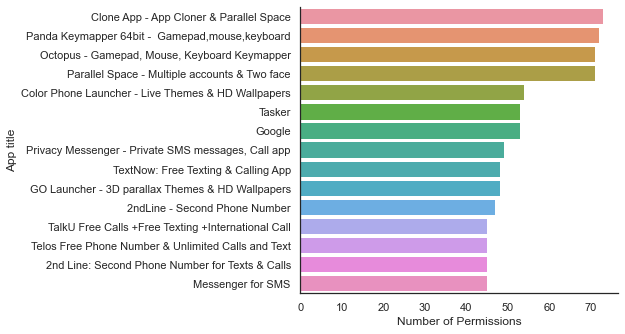

In [9]:
df = df.sort_values('num_permissions', ascending=False)
sns.set(rc={'figure.figsize':(5.7,5.27)})
sns.set_style("white")
splot = sns.barplot(data=df.head(15), x='num_permissions', y='title', orient = 'h', linewidth=0)
splot.set(xlabel="Number of Permissions", ylabel="App title")
sns.despine()
plt.savefig('permissions_per_app.png', bbox_inches = "tight")

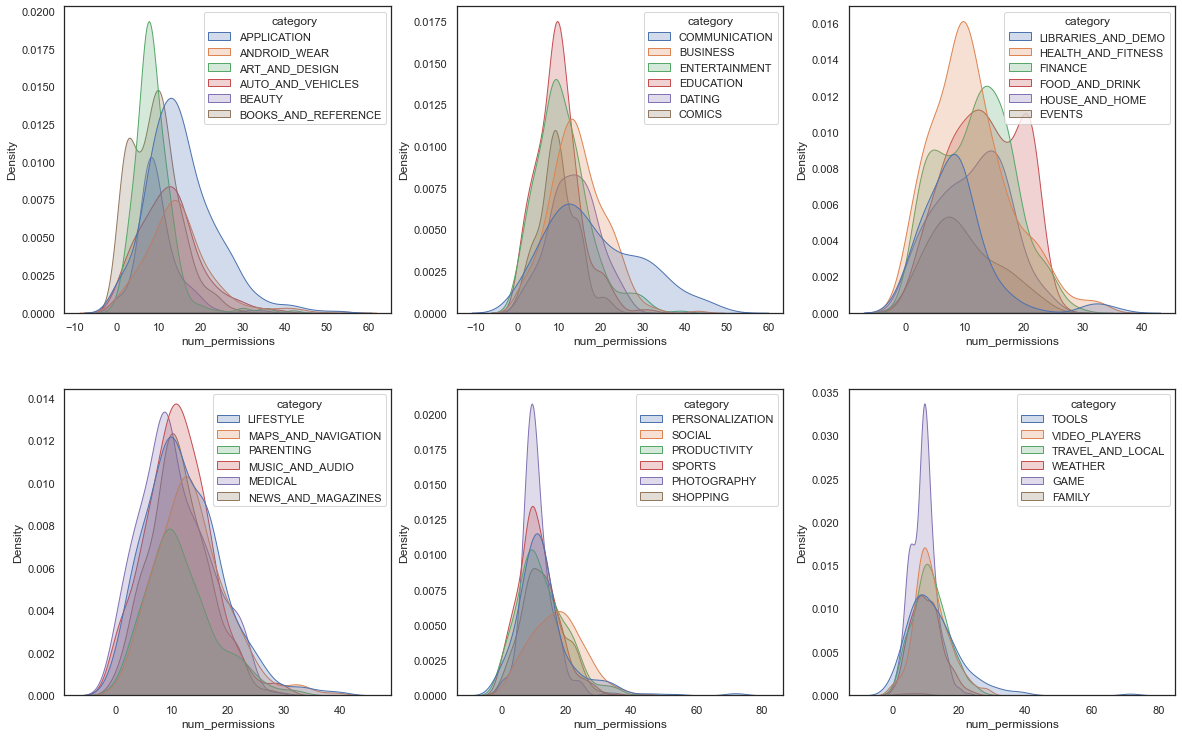

In [10]:
first_cats = ['APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN','AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE']
second_cats = ['BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT']
third_cats = ['EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO']
fourth_cats = ['LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO','NEWS_AND_MAGAZINES', 'PARENTING']
fifth_cats = ['PERSONALIZATION','PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS']
sixth_cats = ['TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME', 'FAMILY']

first_subdf = df[df['category'].isin(first_cats)]
second_subdf = df[df['category'].isin(second_cats)]
third_subdf = df[df['category'].isin(third_cats)]
fourth_subdf = df[df['category'].isin(fourth_cats)]
fifth_subdf = df[df['category'].isin(fifth_cats)]
sixth_subdf = df[df['category'].isin(sixth_cats)]

fig, axs = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
fig.subplots_adjust(wspace=.2)
fig.set_figheight(11)
fig.set_figwidth(18)

plot = sns.kdeplot(data=first_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][0])
plot = sns.kdeplot(data=second_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][1])
plot = sns.kdeplot(data=third_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][2])
plot = sns.kdeplot(data=fourth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][0])
plot = sns.kdeplot(data=fifth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][1])
plot = sns.kdeplot(data=sixth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][2])

plt.savefig('ked_of_permissions.png', bbox_inches = "tight")

In [60]:
cluster = dict()

for idx, row in df.iterrows():
    d = ast.literal_eval(row['permissions'])
    '''
    cat = row["category"]
    if cat not in cluster:
        cluster[cat] = dict()
    '''
    for key, val in d.items():
        for permission in val:
            if permission not in cluster:
                cluster[permission] = list()
            cluster[permission].append(tuple([row["appId"], row['title'], row['installs']]))

perm_counts = dict()
# get a max and min and average.
# app that has the max number of permissons
for key, val in cluster.items():
    #print(key)
    #print(len(val))
    num_apps = len(val)
    pop_name = ""
    pop_installs = ""
    split_installs = 0
    if key not in perm_counts:
        for item in val:
            split = int(item[2].split("+")[0].replace(',', ''))
            if pop_installs != "":
                split_installs = int(pop_installs.split("+")[0].replace(',', ''))
            if split > split_installs:
                pop_name = item[1]
                pop_installs = item[2]
        perm_counts[key] = (num_apps, pop_name, pop_installs)
    else:
        if num_apps > perm_counts[key][0]:
            for item in v:
                split = int(item[2].split("+")[0].replace(',', ''))
                if pop_installs != "":
                    split_installs = int(pop_installs.split("+")[0].replace(',', ''))
                if split > split_installs:
                    pop_name = item[1]
                    pop_installs = item[2]
            perm_counts[key] = (num_apps, pop_name, pop_installs)

permissions_df = pd.DataFrame(perm_counts).T.rename_axis('Permissions').add_prefix('Value').reset_index()
permissions_df = permissions_df.rename(columns={"Value0": "Count", "Value1": "Popular application", "Value2": "Installs"})

In [61]:
#permissions_df = permissions_df.sort_values('Count', ascending=False)
permissions_df

,Permissions,Count,Popular application,Installs
0,read cell broadcast messages,1,Clone App - App Cloner & Parallel Space,"5,000,000+"
1,body sensors (like heart rate monitors),61,Samsung Health,"1,000,000,000+"
2,read phone status and identity,4828,Google,"5,000,000,000+"
3,access extra location provider commands,179,LINE: Free Calls & Messages,"500,000,000+"
4,precise location (GPS and network-based),3326,Google,"5,000,000,000+"
...,...,...,...,...
82,receive text messages (WAP),7,Messages,"1,000,000,000+"
83,erase USB storage,7,Mobile Security: VPN Proxy & Anti Theft Safe WiFi,"50,000,000+"
84,enable app debugging,8,Pregnancy + tracker,"10,000,000+"
85,modify global animation speed,1,Rosetta Stone: Learn Languages,"10,000,000+"


In [62]:
permissions_df = permissions_df.sort_values('Count', ascending=False)
styled_df1 = permissions_df.head(15)

permissions_df = permissions_df.sort_values('Count')
styled_df2 = permissions_df.head(15)

In [63]:
styled_df1

,Permissions,Count,Popular application,Installs
19,read the contents of your USB storage,13700,Google,"5,000,000,000+"
20,modify or delete the contents of your USB storage,13258,Google,"5,000,000,000+"
51,full network access,8491,Google,"5,000,000,000+"
46,view network connections,8169,Google,"5,000,000,000+"
42,prevent device from sleeping,7471,Google,"5,000,000,000+"
22,view Wi-Fi connections,5095,Google,"5,000,000,000+"
2,read phone status and identity,4828,Google,"5,000,000,000+"
45,control vibration,4347,Google,"5,000,000,000+"
41,run at startup,4016,Google,"5,000,000,000+"
4,precise location (GPS and network-based),3326,Google,"5,000,000,000+"


In [64]:
styled_df2

,Permissions,Count,Popular application,Installs
86,access serial ports,1,Peloton - at home fitness,"500,000+"
0,read cell broadcast messages,1,Clone App - App Cloner & Parallel Space,"5,000,000+"
85,modify global animation speed,1,Rosetta Stone: Learn Languages,"10,000,000+"
78,limit number of running processes,2,SmartThings,"100,000,000+"
30,Change WiMAX state,5,Parallel Space - Multiple accounts & Two face,"100,000,000+"
81,set preferred apps,6,GO Launcher - 3D parallax Themes & HD Wallpapers,"100,000,000+"
83,erase USB storage,7,Mobile Security: VPN Proxy & Anti Theft Safe WiFi,"50,000,000+"
82,receive text messages (WAP),7,Messages,"1,000,000,000+"
79,directly call any phone numbers,7,Google,"5,000,000,000+"
77,retrieve system internal state,7,"Android Auto - Google Maps, Media & Messaging","500,000,000+"


In [16]:
styled_df1 = styled_df1.style.hide_index()
styled_df2 = styled_df2.style.hide_index()

styled_df1 = styled_df1.set_properties(**{'text-align': 'left'})
styled_df2 = styled_df2.set_properties(**{'text-align': 'left'})

dfi.export(styled_df1, 'df_Styled_bigger1.png')
dfi.export(styled_df2, 'df_Styled_bigger2.png')

In [17]:
cats_most = dict()
cats_least = dict()
cats_most_v2 = dict()
cats_least_v2 = dict()

for idx, row in df.iterrows():
    if row['category'] not in cats_most:
        cats_most[row['category']] = ('', '', '', '')
        cats_least[row['category']] = ('', '', '', '')
        cats_most_v2[row['category']] = ('', 0, '', 0, '', 0, '', 0)
        cats_least_v2[row['category']] = ('', 0, '', 0, '', 0, '', 0)
        
perm_counts = dict()

# get a max and min and average.
# app that has the max number of permissons
for idx, row in df.iterrows():
    #print(key)
    #print(len(val))
    if row['category'] not in perm_counts:
        perm_counts[row['category']] = dict()
    d = ast.literal_eval(row['permissions'])
    for key, val in d.items():
        for permission in val:
            if permission not in perm_counts[row['category']]:
                perm_counts[row['category']][permission] = 1
            else:
                perm_counts[row['category']][permission] += 1
                
for key in perm_counts:
    most1_k = None
    most2_k = None
    most3_k = None
    most4_k = None
    least1_k = None
    least2_k = None
    least3_k = None
    least4_k = None
    max_num = 0
    max_name = ""
    min_num = 0
    min_name = ""
    
    # get the first most and least
    for next_key in perm_counts[key]:
        if max_num == 0 and min_num == 0:
            max_num = perm_counts[key][next_key]
            min_num = perm_counts[key][next_key]
            max_name = next_key
            min_name = next_key
            pass
        if perm_counts[key][next_key] > max_num:
            max_num = perm_counts[key][next_key]
            max_name = next_key
        if perm_counts[key][next_key] < min_num:
            min_num = perm_counts[key][next_key]
            min_name = next_key
    most1_k = (max_name, max_num)
    least1_k = (min_name, perm_counts[key][min_name])
    perm_counts[key].pop(max_name)
    perm_counts[key].pop(min_name)
    max_num = 0
    min_num = 0
    
    # get the second most and least
    for next_key in perm_counts[key]:
        if max_num == 0 and min_num == 0:
            max_num = perm_counts[key][next_key]
            min_num = perm_counts[key][next_key]
            max_name = next_key
            min_name = next_key
            pass
        if perm_counts[key][next_key] > max_num:
            max_num = perm_counts[key][next_key]
            max_name = next_key
        if perm_counts[key][next_key] < min_num:
            min_num = perm_counts[key][next_key]
            min_name = next_key
    most2_k = (max_name, perm_counts[key][max_name])
    least2_k = (min_name, perm_counts[key][min_name])
    perm_counts[key].pop(max_name)
    perm_counts[key].pop(min_name)
    max_num = 0
    min_num = 0
    
    # get the third most and least
    for next_key in perm_counts[key]:
        if max_num == 0 and min_num == 0:
            max_num = perm_counts[key][next_key]
            min_num = perm_counts[key][next_key]
            max_name = next_key
            min_name = next_key
            pass
        if perm_counts[key][next_key] > max_num:
            max_num = perm_counts[key][next_key]
            max_name = next_key
        if perm_counts[key][next_key] < min_num:
            min_num = perm_counts[key][next_key]
            min_name = next_key
    most3_k = (max_name, perm_counts[key][max_name])
    least3_k = (min_name, perm_counts[key][min_name])
    perm_counts[key].pop(max_name)
    perm_counts[key].pop(min_name)
    max_num = 0
    min_num = 0
    
    # get the fourth most and least
    for next_key in perm_counts[key]:
        if max_num == 0 and min_num == 0:
            max_num = perm_counts[key][next_key]
            min_num = perm_counts[key][next_key]
            max_name = next_key
            min_name = next_key
            pass
        if perm_counts[key][next_key] > max_num:
            max_num = perm_counts[key][next_key]
            max_name = next_key
        if perm_counts[key][next_key] < min_num:
            min_num = perm_counts[key][next_key]
            min_name = next_key
    most4_k = (max_name, perm_counts[key][max_name])
    least4_k = (min_name, perm_counts[key][min_name])

    cats_most[key] = (most1_k[0], most2_k[0], most3_k[0], most4_k[0])
    cats_least[key] = (least1_k[0], least2_k[0], least3_k[0], least4_k[0])
    cats_most_v2[key] = (most1_k[0], most1_k[1], most2_k[0], most2_k[1], most3_k[0], most3_k[1], most4_k[0], most4_k[1])
    cats_least_v2[key] = (least1_k[0], least1_k[1], least2_k[0], least2_k[1], least3_k[0], least3_k[1], least4_k[0], least4_k[1])
    
L1 = [(k, v[0], v[1], v[2], v[3]) for k, v in cats_most.items()]
permcount_df_most_v1 = pd.DataFrame(L1, columns = ['category', 'Permission 1', 'Permission 2', 'Permission 3', 'Permission 4']) 
L1 = [(k, v[0], v[1], v[2], v[3]) for k, v in cats_least.items()]
permcount_df_least_v1 = pd.DataFrame(L1, columns = ['category', 'Permission 1', 'Permission 2', 'Permission 3', 'Permission 4']) 
L2 = [(k, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]) for k, v in cats_most_v2.items()]
permcount_df_most_v2 = pd.DataFrame(L2, columns = ['category', 'Permission 1', 'count', 'Permission 2', 'count', 'Permission 3', 'count', 'Permission 4', 'count'])
L2 = [(k, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]) for k, v in cats_least_v2.items()]
permcount_df_least_v2 = pd.DataFrame(L2, columns = ['category', 'Permission 1', 'count', 'Permission 2', 'count', 'Permission 3', 'count', 'Permission 4', 'count'])

In [18]:
for key in perm_counts:
    if 'erase USB storage' in perm_counts[key]:
        print(key, "Erase USB storage: ", perm_counts[key]['erase USB storage'])

BOOKS_AND_REFERENCE Erase USB storage:  1


In [20]:
permcount_df_most_v1

,category,Permission 1,Permission 2,Permission 3,Permission 4
0,PERSONALIZATION,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections
1,TOOLS,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections
2,APPLICATION,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections
3,ANDROID_WEAR,read the contents of your USB storage,modify or delete the contents of your USB storage,prevent device from sleeping,full network access
4,COMMUNICATION,read the contents of your USB storage,modify or delete the contents of your USB storage,read phone status and identity,full network access
5,SOCIAL,read the contents of your USB storage,modify or delete the contents of your USB storage,read phone status and identity,full network access
6,PRODUCTIVITY,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections
7,BUSINESS,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections
8,ART_AND_DESIGN,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections
9,LIFESTYLE,read the contents of your USB storage,modify or delete the contents of your USB storage,full network access,view network connections


In [21]:
permcount_df_least_v1

,category,Permission 1,Permission 2,Permission 3,Permission 4
0,PERSONALIZATION,read cell broadcast messages,access extra location provider commands,make/receive SIP calls,Change WiMAX state
1,TOOLS,set preferred apps,erase USB storage,receive text messages (MMS),send SMS messages
2,APPLICATION,retrieve system internal state,Change WiMAX state,limit number of running processes,set time zone
3,ANDROID_WEAR,change/intercept network settings and traffic,directly call any phone numbers,read your Web bookmarks and history,write web bookmarks and history
4,COMMUNICATION,body sensors (like heart rate monitors),delete all app cache data,add words to user-defined dictionary,mock location sources for testing
5,SOCIAL,modify phone state,make/receive SIP calls,read battery statistics,read your text messages (SMS or MMS)
6,PRODUCTIVITY,modify phone state,erase USB storage,read terms you added to the dictionary,add words to user-defined dictionary
7,BUSINESS,modify phone state,erase USB storage,delete all app cache data,change/intercept network settings and traffic
8,ART_AND_DESIGN,add or modify calendar events and send email t...,mock location sources for testing,write web bookmarks and history,reorder running apps
9,LIFESTYLE,retrieve system internal state,delete all app cache data,read your text messages (SMS or MMS),receive text messages (SMS)


In [22]:
permcount_df_most_v2

,category,Permission 1,count,Permission 2,count,Permission 3,count,Permission 4,count
0,PERSONALIZATION,read the contents of your USB storage,504,modify or delete the contents of your USB storage,496,full network access,269,view network connections,266
1,TOOLS,read the contents of your USB storage,440,modify or delete the contents of your USB storage,412,full network access,281,view network connections,269
2,APPLICATION,read the contents of your USB storage,604,modify or delete the contents of your USB storage,588,full network access,346,view network connections,336
3,ANDROID_WEAR,read the contents of your USB storage,266,modify or delete the contents of your USB storage,244,prevent device from sleeping,165,full network access,159
4,COMMUNICATION,read the contents of your USB storage,426,modify or delete the contents of your USB storage,404,read phone status and identity,290,full network access,248
5,SOCIAL,read the contents of your USB storage,384,modify or delete the contents of your USB storage,376,read phone status and identity,234,full network access,216
6,PRODUCTIVITY,read the contents of your USB storage,482,modify or delete the contents of your USB storage,456,full network access,280,view network connections,272
7,BUSINESS,read the contents of your USB storage,486,modify or delete the contents of your USB storage,468,full network access,270,view network connections,262
8,ART_AND_DESIGN,read the contents of your USB storage,418,modify or delete the contents of your USB storage,410,full network access,229,view network connections,219
9,LIFESTYLE,read the contents of your USB storage,480,modify or delete the contents of your USB storage,470,full network access,302,view network connections,279


In [23]:
permcount_df_least_v2

,category,Permission 1,count,Permission 2,count,Permission 3,count,Permission 4,count
0,PERSONALIZATION,read cell broadcast messages,1,access extra location provider commands,2,make/receive SIP calls,2,Change WiMAX state,2
1,TOOLS,set preferred apps,1,erase USB storage,1,receive text messages (MMS),1,send SMS messages,1
2,APPLICATION,retrieve system internal state,1,Change WiMAX state,1,limit number of running processes,1,set time zone,1
3,ANDROID_WEAR,change/intercept network settings and traffic,1,directly call any phone numbers,1,read your Web bookmarks and history,1,write web bookmarks and history,1
4,COMMUNICATION,body sensors (like heart rate monitors),1,delete all app cache data,1,add words to user-defined dictionary,1,mock location sources for testing,2
5,SOCIAL,modify phone state,1,make/receive SIP calls,1,read battery statistics,1,read your text messages (SMS or MMS),1
6,PRODUCTIVITY,modify phone state,1,erase USB storage,1,read terms you added to the dictionary,1,add words to user-defined dictionary,1
7,BUSINESS,modify phone state,1,erase USB storage,1,delete all app cache data,1,change/intercept network settings and traffic,1
8,ART_AND_DESIGN,add or modify calendar events and send email t...,1,mock location sources for testing,1,write web bookmarks and history,1,reorder running apps,1
9,LIFESTYLE,retrieve system internal state,1,delete all app cache data,1,read your text messages (SMS or MMS),1,receive text messages (SMS),1


[Text(0, 0.5, 'Avg. Permissions Required Per App')]

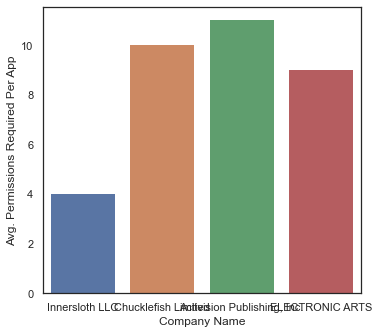

In [24]:
# com.innersloth.spacemafia
# com.mygdx.digtochina.android
# ^ Innersloth
inner_sloth_games = df[df["developer"] == "Innersloth LLC"] 
num_sloth_perms = inner_sloth_games["num_permissions"].mean()



# com.chucklefish.stardewvalley
# ^ Chucklefish
chucklefish_games = df[df["developer"] == "Chucklefish Limited"]
num_chucklefish_perms = chucklefish_games["num_permissions"].mean()



activision_games = df[df["developer"] == "Activision Publishing, Inc."]
avg_perm_activision = activision_games["num_permissions"].mean()



EA_games = df[df["developer"] == "ELECTRONIC ARTS"]
avg_perm_EA = EA_games["num_permissions"].mean()


yvals = [num_sloth_perms, num_chucklefish_perms, avg_perm_activision, avg_perm_EA]
xvals = ["Innersloth LLC", "Chucklefish Limited", "Activision Publishing, Inc.", "ELECTRONIC ARTS"]

splot = sns.barplot(x=xvals, y=yvals, linewidth=0)
splot.set(xlabel="Company Name")
splot.set(ylabel="Avg. Permissions Required Per App")

# com.bethsoft.DOOM
# com.bethsoft.falloutshelter
# com.bethsoft.theelderscrollslegends
# com.bethsoft.DOOMII
# ^ Bethesda

# com.ea.gp.maddennfl21mobile
# com.ea.games.nfs13_na
# com.ea.game.starwarscapital_row
# com.ea.game.pvz2_na
# com.ea.gp.pvzheroes
# com.ea.game.simpsons4_na
# com.ea.gp.bejeweledskies
# com.ea.BejeweledBlitz_na
# com.ea.game.nfs14_row
# com.ea.games.r3_na
# com.ea.games.simsfreeplay_na
# com.ea.gp.simsmobile
# com.ea.game.simcitymobile_row
# com.ea.gp.fifamobile
# com.ea.gp.nbamobile
# com.ea.game.easportsufc_row
# com.eamobile.nbajam_na_wf
# com.ea.gp.fifaultimate
# com.ea.game.pvzfree_row
# ^ EA